In [1]:
def gini_impurity(class_counts):
    """
    Calculate the Gini impurity for a node.

    Parameters:
    class_counts (list): A list of counts for each class in the node.

    Returns:
    float: The Gini impurity of the node.
    """
    total_samples = sum(class_counts)
    if total_samples == 0:
        return 0  # If the node is empty, Gini impurity is 0

    probabilities = [count / total_samples for count in class_counts]
    gini = 1 - sum(p ** 2 for p in probabilities)
    return gini

# Example cases
examples = [
    [15, 15],          # Class 1: 15, Class 2: 15 → Gini impurity 0.500
    [15, 15, 15],      # Class 1: 15, Class 2: 15, Class 3: 15 → Gini impurity 0.667
    [18, 12],          # Class 1: 18, Class 2: 12 → Gini impurity 0.480
    [30, 0]            # Class 1: 30, Class 2: 0 → Gini impurity 0.000
]

# Calculate Gini impurity for each example
for i, counts in enumerate(examples):
    gini = gini_impurity(counts)
    print(f"Example {i + 1}: Class counts = {counts}, Gini impurity = {gini:.3f}")


Example 1: Class counts = [15, 15], Gini impurity = 0.500
Example 2: Class counts = [15, 15, 15], Gini impurity = 0.667
Example 3: Class counts = [18, 12], Gini impurity = 0.480
Example 4: Class counts = [30, 0], Gini impurity = 0.000


In [2]:
def information_gain(parent_counts, left_counts, right_counts):
    """
    Calculate the information gain between nodes.

    Parameters:
    parent_counts (list): Class counts for the parent node.
    left_counts (list): Class counts for the left child node.
    right_counts (list): Class counts for the right child node.

    Returns:
    float: The information gain.
    """
    # Total samples in parent, left, and right nodes
    N_parent = sum(parent_counts)
    N_left = sum(left_counts)
    N_right = sum(right_counts)

    # Calculate Gini impurity for parent, left, and right nodes
    parent_gini = gini_impurity(parent_counts)
    left_gini = gini_impurity(left_counts)
    right_gini = gini_impurity(right_counts)

    # Compute information gain
    info_gain = (
        parent_gini
        - (N_left / N_parent) * left_gini
        - (N_right / N_parent) * right_gini
    )
    return info_gain

# Example
parent_counts = [30, 35]  # Parent node: 30 samples of class 1, 35 samples of class 2
left_counts = [10, 30]    # Left node: 10 samples of class 1, 30 samples of class 2
right_counts = [20, 5]    # Right node: 20 samples of class 1, 5 samples of class 2

# Calculate information gain
info_gain = information_gain(parent_counts, left_counts, right_counts)
print(f"Information Gain = {info_gain:.3f}")


Information Gain = 0.143


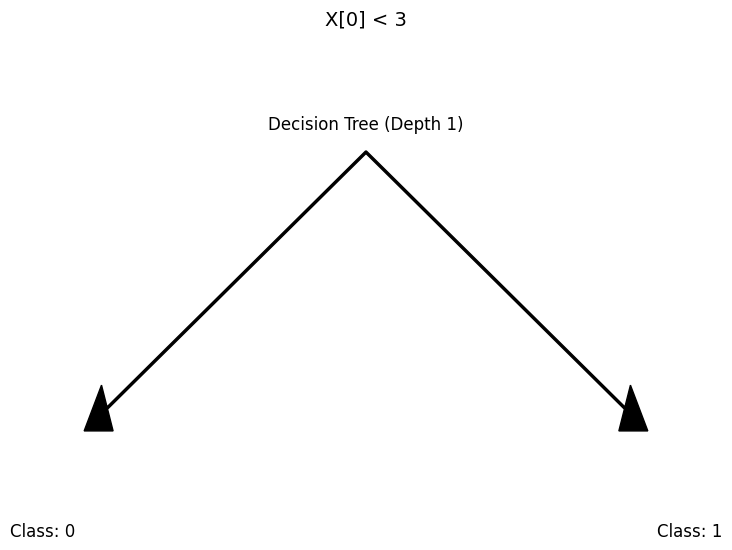

Decision Tree: {'feature': 0, 'threshold': np.int64(3), 'left': {'class': np.int64(0)}, 'right': {'class': np.int64(1)}}


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gini impurity and information gain functions
def gini_impurity(class_counts):
    total = sum(class_counts)
    if total == 0:
        return 0
    return 1 - sum((count / total) ** 2 for count in class_counts)

def information_gain(parent_counts, left_counts, right_counts):
    N_parent = sum(parent_counts)
    N_left = sum(left_counts)
    N_right = sum(right_counts)
    parent_gini = gini_impurity(parent_counts)
    left_gini = gini_impurity(left_counts)
    right_gini = gini_impurity(right_counts)
    info_gain = (
        parent_gini
        - (N_left / N_parent) * left_gini
        - (N_right / N_parent) * right_gini
    )
    return info_gain

# Create a dataset
def create_dataset():
    X = np.array([[2, 3], [1, 1], [3, 3], [2, 2], [3, 1]])
    y = np.array([0, 0, 1, 1, 1])
    return X, y

# Find the best split
def find_best_split(X, y):
    best_feature = None
    best_threshold = None
    best_info_gain = -1
    n_samples, n_features = X.shape
    parent_counts = [sum(y == c) for c in np.unique(y)]

    for feature in range(n_features):  # Iterate over features
        thresholds = np.unique(X[:, feature])  # Use feature values as thresholds
        for threshold in thresholds:
            # Split data based on the threshold
            left_indices = X[:, feature] < threshold
            right_indices = ~left_indices
            
            left_counts = [sum(y[left_indices] == c) for c in np.unique(y)]
            right_counts = [sum(y[right_indices] == c) for c in np.unique(y)]
            
            # Compute information gain
            info_gain = information_gain(parent_counts, left_counts, right_counts)
            
            # Update the best split
            if info_gain > best_info_gain:
                best_feature = feature
                best_threshold = threshold
                best_info_gain = info_gain

    return best_feature, best_threshold, best_info_gain

# Generate a depth-1 decision tree
def build_decision_tree(X, y):
    best_feature, best_threshold, best_info_gain = find_best_split(X, y)

    # Split the data
    left_indices = X[:, best_feature] < best_threshold
    right_indices = ~left_indices

    left_class = np.bincount(y[left_indices]).argmax() if np.any(left_indices) else None
    right_class = np.bincount(y[right_indices]).argmax() if np.any(right_indices) else None

    # Return the decision tree structure
    return {
        "feature": best_feature,
        "threshold": best_threshold,
        "left": {"class": left_class},
        "right": {"class": right_class},
    }

# Visualize the decision tree
def visualize_decision_tree(tree):
    plt.figure(figsize=(8, 4))
    plt.title("Decision Tree (Depth 1)")
    feature = tree["feature"]
    threshold = tree["threshold"]
    plt.text(0.5, 0.6, f"X[{feature}] < {threshold}", ha="center", fontsize=14)
    plt.text(0.25, 0.4, f"Class: {tree['left']['class']}", ha="center", fontsize=12)
    plt.text(0.75, 0.4, f"Class: {tree['right']['class']}", ha="center", fontsize=12)
    plt.arrow(0.5, 0.55, -0.2, -0.1, head_width=0.02, head_length=0.02, fc="black", ec="black")
    plt.arrow(0.5, 0.55, 0.2, -0.1, head_width=0.02, head_length=0.02, fc="black", ec="black")
    plt.axis("off")
    plt.show()

# Main execution
X, y = create_dataset()
tree = build_decision_tree(X, y)
visualize_decision_tree(tree)
print("Decision Tree:", tree)


In [4]:
class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree to the data by finding the best split."""
        best_feature, best_threshold, _ = self._find_best_split(X, y)

        # Split the data
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        # Determine classes for left and right nodes
        left_class = np.bincount(y[left_indices]).argmax() if np.any(left_indices) else None
        right_class = np.bincount(y[right_indices]).argmax() if np.any(right_indices) else None

        # Store the tree structure
        self.tree = {
            "feature": best_feature,
            "threshold": best_threshold,
            "left": {"class": left_class},
            "right": {"class": right_class},
        }

    def _find_best_split(self, X, y):
        """Find the best split for the decision tree."""
        best_feature = None
        best_threshold = None
        best_info_gain = -1
        n_samples, n_features = X.shape
        parent_counts = [sum(y == c) for c in np.unique(y)]

        for feature in range(n_features):  # Iterate over features
            thresholds = np.unique(X[:, feature])  # Use feature values as thresholds
            for threshold in thresholds:
                # Split data based on the threshold
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                left_counts = [sum(y[left_indices] == c) for c in np.unique(y)]
                right_counts = [sum(y[right_indices] == c) for c in np.unique(y)]

                # Compute information gain
                info_gain = information_gain(parent_counts, left_counts, right_counts)

                # Update the best split
                if info_gain > best_info_gain:
                    best_feature = feature
                    best_threshold = threshold
                    best_info_gain = info_gain

        return best_feature, best_threshold, best_info_gain

    def predict(self, X):
        """Predict the class for each sample in X."""
        predictions = []
        for sample in X:
            # Check the split condition for each sample
            if sample[self.tree["feature"]] < self.tree["threshold"]:
                predictions.append(self.tree["left"]["class"])
            else:
                predictions.append(self.tree["right"]["class"])
        return np.array(predictions)

# Helper functions
def gini_impurity(class_counts):
    total = sum(class_counts)
    if total == 0:
        return 0
    return 1 - sum((count / total) ** 2 for count in class_counts)

def information_gain(parent_counts, left_counts, right_counts):
    N_parent = sum(parent_counts)
    N_left = sum(left_counts)
    N_right = sum(right_counts)
    parent_gini = gini_impurity(parent_counts)
    left_gini = gini_impurity(left_counts)
    right_gini = gini_impurity(right_counts)
    info_gain = (
        parent_gini
        - (N_left / N_parent) * left_gini
        - (N_right / N_parent) * right_gini
    )
    return info_gain

# Example usage
X = np.array([[2, 3], [1, 1], [3, 3], [2, 2], [3, 1]])
y = np.array([0, 0, 1, 1, 1])

# Initialize and train the decision tree
model = ScratchDecisionTreeClassifierDepth1()
model.fit(X, y)

# Predict new samples
X_test = np.array([[1.5, 2], [3, 2.5], [2, 1]])
predictions = model.predict(X_test)
print("Predictions:", predictions)

# Output the tree structure
print("Decision Tree Structure:", model.tree)


Predictions: [0 1 0]
Decision Tree Structure: {'feature': 0, 'threshold': np.int64(3), 'left': {'class': np.int64(0)}, 'right': {'class': np.int64(1)}}


In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Simple Dataset 2: Binary classification dataset
# Features: [x1, x2], Classes: 0 or 1
X = np.array([
    [2, 3], [1, 1], [3, 3], [2, 2], [3, 1], [5, 3], [1, 0], [3, 2], [4, 4], [0, 0],
    [6, 6], [7, 7], [8, 5], [9, 5], [7, 6], [2, 1], [3, 0], [5, 1], [6, 4], [7, 3]
])
y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scratch implementation
scratch_model = ScratchDecisionTreeClassifierDepth1()
scratch_model.fit(X_train, y_train)
y_pred_scratch = scratch_model.predict(X_test)

# Scikit-learn implementation
sklearn_model = DecisionTreeClassifier(max_depth=1, random_state=42)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")

# Compare metrics
print_metrics(y_test, y_pred_scratch, "Scratch Implementation")
print_metrics(y_test, y_pred_sklearn, "Scikit-learn Implementation")

# Decision tree structure output
print("\nScratch Decision Tree Structure:", scratch_model.tree)



Metrics for Scratch Implementation:
Accuracy: 0.500
Precision: 0.500
Recall: 1.000

Metrics for Scikit-learn Implementation:
Accuracy: 0.500
Precision: 0.500
Recall: 1.000

Scratch Decision Tree Structure: {'feature': 1, 'threshold': np.int64(1), 'left': {'class': np.int64(0)}, 'right': {'class': np.int64(1)}}


In [7]:
print("\nScratch Decision Tree Structure:", scratch_model.tree)



Scratch Decision Tree Structure: {'feature': 1, 'threshold': np.int64(1), 'left': {'class': np.int64(0)}, 'right': {'class': np.int64(1)}}


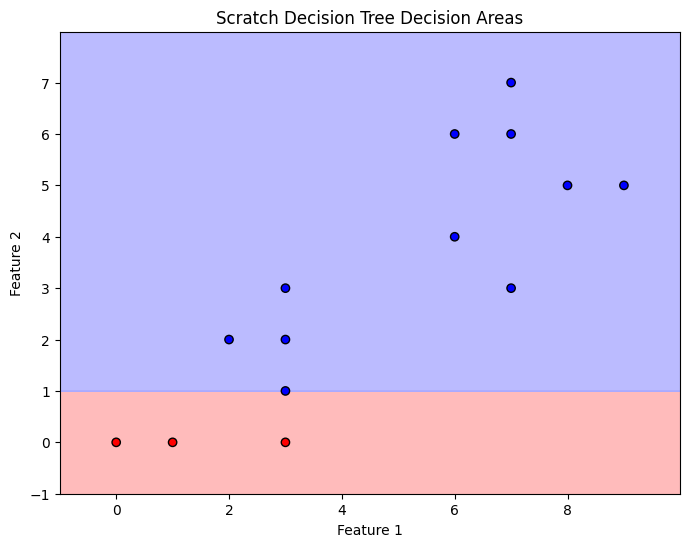

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_area(X, y, model, title="Decision Area"):
    """
    Visualizes decision areas for a 2D dataset.
    
    Parameters:
        X (ndarray): Feature matrix (shape: [n_samples, 2])
        y (ndarray): Labels (shape: [n_samples])
        model (object): Trained ScratchDecisionTreeClassifierDepth1 model
        title (str): Title of the plot
    """
    # Generate a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create a custom colormap
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_points)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Assuming X_train, y_train, and scratch_model are already defined
plot_decision_area(X_train, y_train, scratch_model, title="Scratch Decision Tree Decision Areas")


In [9]:
class ScratchDecisionTreeClassifierDepth2:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        """
        Fit the decision tree with depth 2 to the training data.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])
            y (ndarray): Labels (shape: [n_samples])
        """
        # First split (root node)
        self.tree = self._best_split(X, y)
        left_mask = X[:, self.tree["feature"]] < self.tree["threshold"]
        right_mask = ~left_mask

        # Split left child node if impurity > 0
        if len(np.unique(y[left_mask])) > 1:
            self.tree["left"] = self._best_split(X[left_mask], y[left_mask])
        else:
            self.tree["left"] = {"class": np.argmax(np.bincount(y[left_mask]))}

        # Split right child node if impurity > 0
        if len(np.unique(y[right_mask])) > 1:
            self.tree["right"] = self._best_split(X[right_mask], y[right_mask])
        else:
            self.tree["right"] = {"class": np.argmax(np.bincount(y[right_mask]))}

    def _best_split(self, X, y):
        """
        Find the best split for the given data.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])
            y (ndarray): Labels (shape: [n_samples])

        Returns:
            dict: The best split containing feature, threshold, and Gini impurity.
        """
        best_split = {"gini": float("inf"), "feature": None, "threshold": None}
        parent_gini = self._gini_impurity(y)
        n_samples = len(y)

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask

                left_gini = self._gini_impurity(y[left_mask])
                right_gini = self._gini_impurity(y[right_mask])

                gini = (
                    len(y[left_mask]) / n_samples * left_gini
                    + len(y[right_mask]) / n_samples * right_gini
                )

                if gini < best_split["gini"]:
                    best_split = {
                        "feature": feature,
                        "threshold": threshold,
                        "gini": gini,
                    }

        return best_split

    def _gini_impurity(self, y):
        """
        Calculate Gini impurity for a set of labels.

        Parameters:
            y (ndarray): Labels (shape: [n_samples])

        Returns:
            float: Gini impurity
        """
        if len(y) == 0:
            return 0
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return 1 - np.sum(probabilities**2)

    def predict(self, X):
        """
        Predict the class for each sample in X.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])

        Returns:
            ndarray: Predicted class labels (shape: [n_samples])
        """
        predictions = []
        for sample in X:
            node = self.tree
            while "class" not in node:
                if sample[node["feature"]] < node["threshold"]:
                    node = node["left"]
                else:
                    node = node["right"]
            predictions.append(node["class"])
        return np.array(predictions)


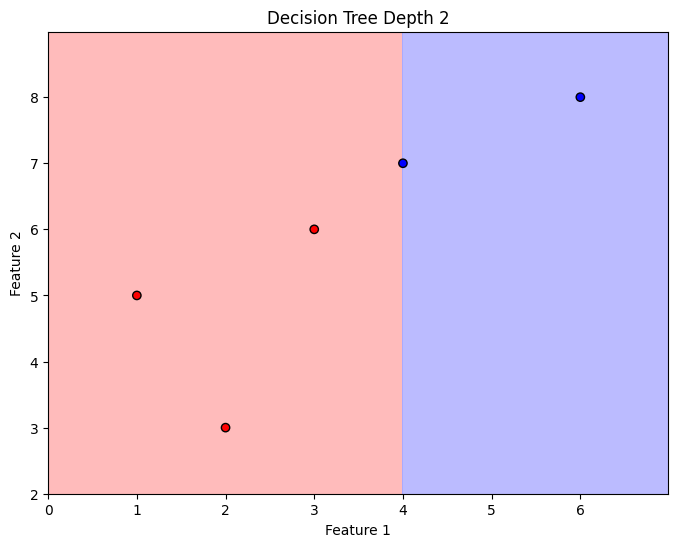

Predicted labels: [0 0 1 1 0]


In [10]:
# Example dataset
X_train = np.array([[2, 3], [1, 5], [4, 7], [6, 8], [3, 6]])
y_train = np.array([0, 0, 1, 1, 0])

# Train the depth-2 decision tree
model = ScratchDecisionTreeClassifierDepth2()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Visualize decision regions
plot_decision_area(X_train, y_train, model, title="Decision Tree Depth 2")
print("Predicted labels:", y_pred)


In [11]:
class ScratchDecisionTreeClassifierDepthInf:
    def __init__(self, max_depth=None):
        """
        Initialize the decision tree classifier.

        Parameters:
            max_depth (int or None): Maximum depth of the tree. If None, grows tree until all leaf nodes are pure.
        """
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """
        Fit the decision tree to the training data.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])
            y (ndarray): Labels (shape: [n_samples])
        """
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.

        Parameters:
            X (ndarray): Feature matrix at the current node.
            y (ndarray): Labels at the current node.
            depth (int): Current depth of the tree.

        Returns:
            dict: Node information (feature, threshold, left, right, or class for leaf nodes).
        """
        # If all samples belong to one class or max depth is reached, create a leaf node
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {"class": np.argmax(np.bincount(y))}

        # Find the best split
        best_split = self._best_split(X, y)
        if best_split["gini"] == float("inf"):  # No valid split
            return {"class": np.argmax(np.bincount(y))}

        # Create left and right child nodes
        left_mask = X[:, best_split["feature"]] < best_split["threshold"]
        right_mask = ~left_mask

        return {
            "feature": best_split["feature"],
            "threshold": best_split["threshold"],
            "left": self._build_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self._build_tree(X[right_mask], y[right_mask], depth + 1),
        }

    def _best_split(self, X, y):
        """
        Find the best split for the given data.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])
            y (ndarray): Labels (shape: [n_samples])

        Returns:
            dict: The best split containing feature, threshold, and Gini impurity.
        """
        best_split = {"gini": float("inf"), "feature": None, "threshold": None}
        n_samples = len(y)

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask

                left_gini = self._gini_impurity(y[left_mask])
                right_gini = self._gini_impurity(y[right_mask])

                gini = (
                    len(y[left_mask]) / n_samples * left_gini
                    + len(y[right_mask]) / n_samples * right_gini
                )

                if gini < best_split["gini"]:
                    best_split = {
                        "feature": feature,
                        "threshold": threshold,
                        "gini": gini,
                    }

        return best_split

    def _gini_impurity(self, y):
        """
        Calculate Gini impurity for a set of labels.

        Parameters:
            y (ndarray): Labels (shape: [n_samples])

        Returns:
            float: Gini impurity
        """
        if len(y) == 0:
            return 0
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return 1 - np.sum(probabilities**2)

    def predict(self, X):
        """
        Predict the class for each sample in X.

        Parameters:
            X (ndarray): Feature matrix (shape: [n_samples, n_features])

        Returns:
            ndarray: Predicted class labels (shape: [n_samples])
        """
        predictions = []
        for sample in X:
            node = self.tree
            while "class" not in node:
                if sample[node["feature"]] < node["threshold"]:
                    node = node["left"]
                else:
                    node = node["right"]
            predictions.append(node["class"])
        return np.array(predictions)


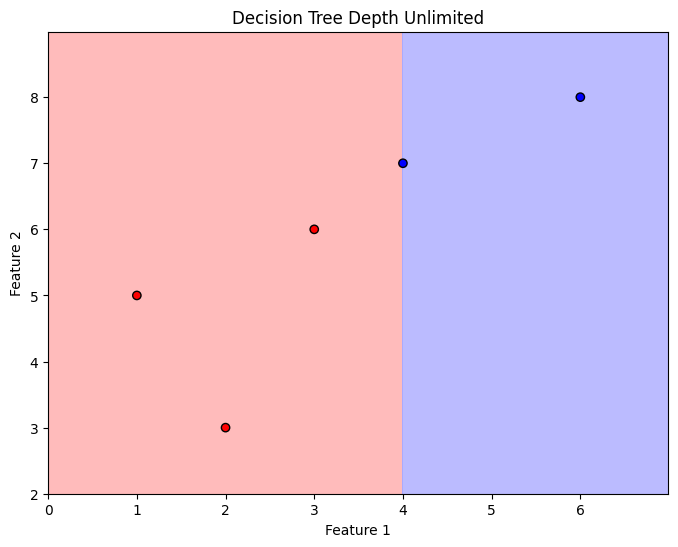

Predicted labels: [0 0 1 1 0]


In [12]:
# Example dataset
X_train = np.array([[2, 3], [1, 5], [4, 7], [6, 8], [3, 6]])
y_train = np.array([0, 0, 1, 1, 0])

# Train the depth-infinite decision tree
model = ScratchDecisionTreeClassifierDepthInf(max_depth=None)  # Unlimited depth
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Visualize decision regions
plot_decision_area(X_train, y_train, model, title="Decision Tree Depth Unlimited")
print("Predicted labels:", y_pred)
